In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn import linear_model, preprocessing 
import warnings

In [2]:
survey = pd.read_csv('/Users/danielle.arneson/Desktop/updatedsurvey.csv')
clients = pd.read_csv('/Users/danielle.arneson/Desktop/clients.csv')

In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User Progress Id              2126 non-null   int64  
 1   Survey Id                     2126 non-null   int64  
 2   Survey Title                  2126 non-null   object 
 3   Language                      0 non-null      float64
 4   Mode                          1946 non-null   object 
 5   Wave Start Date               2126 non-null   object 
 6   Wave End Date                 2126 non-null   object 
 7   Status                        2126 non-null   object 
 8   Participant Id                0 non-null      float64
 9   Publish Id                    2126 non-null   int64  
 10  Instance                      2126 non-null   int64  
 11  User Id                       2126 non-null   int64  
 12  Contact Id                    2126 non-null   object 
 13  Ext

In [4]:
survey.head(10)

,User Progress Id,Survey Id,Survey Title,Language,Mode,Wave Start Date,Wave End Date,Status,Participant Id,Publish Id,...,Employer Id,Start Date Time Stamp,End Date Time Stamp,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback
0,3021429,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,100845,2021-01-28 19:22:12,2021-01-28 21:24:49,10.0,10.0,5.0,5.0,Neutral,Very Satisfied,NaN
1,3021716,1616,1:1 Coaching survey,NaN,NaN,2021-01-28 08:00:00,2051-01-28 08:00:00,Incomplete,NaN,1616,...,NaN,2021-01-28 19:57:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3021859,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,Strongly Agree,Very Satisfied,Helpful and pleasant. Meets me where I am to ...
3,3021984,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,Agree,Satisfied,No Thank you
4,3022251,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach has help me build my confidence in ac...
5,3022282,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach is very knowledgeable about health is...
6,3022315,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Incomplete,NaN,1616,...,100845,2021-01-28 21:24:53,NaN,5.0,5.0,5.0,6.0,Agree,Neutral,NaN
7,3022444,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,Agree,Satisfied,No
8,3022571,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,106914,2021-01-28 22:11:28,2021-01-28 22:12:27,6.0,7.0,4.0,3.0,Neutral,Satisfied,NaN
9,3022663,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 22:29:21,2021-01-28 22:30:13,9.0,8.0,8.0,8.0,Agree,Satisfied,"no, thank you!"


In [5]:
#data cleaning 
survey.columns = survey.columns.str.lower()
survey.columns = survey.columns.str.replace(" ","_")
survey['coachinghabitsgoalsalignment'] = survey['coachinghabitsgoalsalignment'].str.lower()
survey['coachingsatisfaction'] = survey['coachingsatisfaction'].str.lower()
survey['coachinghabitsgoalsalignment'] = survey['coachinghabitsgoalsalignment'].str.replace(" ","_")
survey['coachingsatisfaction'] = survey['coachingsatisfaction'].str.replace(" ", "_")
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_progress_id              2126 non-null   int64  
 1   survey_id                     2126 non-null   int64  
 2   survey_title                  2126 non-null   object 
 3   language                      0 non-null      float64
 4   mode                          1946 non-null   object 
 5   wave_start_date               2126 non-null   object 
 6   wave_end_date                 2126 non-null   object 
 7   status                        2126 non-null   object 
 8   participant_id                0 non-null      float64
 9   publish_id                    2126 non-null   int64  
 10  instance                      2126 non-null   int64  
 11  user_id                       2126 non-null   int64  
 12  contact_id                    2126 non-null   object 
 13  ext

In [6]:
survey = survey.drop(columns =['language', 'participant_id', 'wave_start_date', 'wave_end_date', 'mode', 'instance','user_id','user_progress_id']) #remove columns that aren't useful
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   survey_id                     2126 non-null   int64  
 1   survey_title                  2126 non-null   object 
 2   status                        2126 non-null   object 
 3   publish_id                    2126 non-null   int64  
 4   contact_id                    2126 non-null   object 
 5   external_participant_id       2126 non-null   object 
 6   employer_id                   1565 non-null   object 
 7   start_date_time_stamp         2126 non-null   object 
 8   end_date_time_stamp           1937 non-null   object 
 9   coachingconfidence            1946 non-null   float64
 10  coachingmotivation            1944 non-null   float64
 11  cmlflourishoverallsatisfied   1944 non-null   float64
 12  cmlflourishhappy              1944 non-null   float64
 13  coa

In [7]:
survey['status'].unique()

array(['Completed', 'Incomplete'], dtype=object)

In [8]:
survey = survey.drop(survey[survey.status == 'Incomplete'].index) #removed all incomplete surveys 

In [9]:
survey['status'].replace('Completed','1',inplace=True)#changed all completed surveys to 1

In [10]:
survey['status'] = survey['status'].astype(str).astype(int)

In [11]:
survey['status'].unique()

array([1])

In [12]:
survey = survey[(~survey['contact_id'].str.contains('test'))] #dropping all test contacts 

In [13]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 2 to 2125
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   survey_id                     1936 non-null   int64  
 1   survey_title                  1936 non-null   object 
 2   status                        1936 non-null   int64  
 3   publish_id                    1936 non-null   int64  
 4   contact_id                    1936 non-null   object 
 5   external_participant_id       1936 non-null   object 
 6   employer_id                   1560 non-null   object 
 7   start_date_time_stamp         1936 non-null   object 
 8   end_date_time_stamp           1936 non-null   object 
 9   coachingconfidence            1936 non-null   float64
 10  coachingmotivation            1936 non-null   float64
 11  cmlflourishoverallsatisfied   1936 non-null   float64
 12  cmlflourishhappy              1936 non-null   float64
 13  coa

In [14]:
survey.head(10)

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No
8,1616,1:1 Coaching survey,1,1616,0035Y00003kT5WzQAK,27fd15b6-e0ff-410e-a470-7cb65699865e,106914,2021-01-28 22:11:28,2021-01-28 22:12:27,6.0,7.0,4.0,3.0,neutral,satisfied,NaN
9,1616,1:1 Coaching survey,1,1616,0035Y00003kScSsQAK,3e09e650-6de1-4373-8d56-dd9c60339c8d,CCHMC,2021-01-28 22:29:21,2021-01-28 22:30:13,9.0,8.0,8.0,8.0,agree,satisfied,"no, thank you!"
10,1616,1:1 Coaching survey,1,1616,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,Vericast,2021-01-28 23:34:53,2021-01-29 00:06:30,10.0,10.0,9.0,10.0,agree,very_satisfied,Looking forward to the sessions and what we ca...
11,1616,1:1 Coaching survey,1,1616,0031O00003Yat8LQAR,5e3cc42f-a6b2-79bd-0be1-38cb2e30a498,dawn_food_products,2021-01-28 23:53:22,2021-01-28 23:54:37,7.0,7.0,6.0,4.0,neutral,very_satisfied,NaN
12,1616,1:1 Coaching survey,1,1616,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,Vericast,2021-01-29 00:06:41,2021-01-29 00:09:57,10.0,10.0,9.0,10.0,agree,very_satisfied,NaN


In [15]:
survey['publish_id'].unique() #checking to make sure all survey data collected is for the 1:1 survey 

array([1616])

In [16]:
survey['confidencedifference']=survey.sort_values('external_participant_id').groupby('external_participant_id')['coachingconfidence'].diff()
survey

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-1.0
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1616,1:1 Coaching survey,1,1616,0031O00003eEuujQAC,72496e57-763c-4ee9-9d48-de9f6ad1cf35,NaN,2021-03-28 22:20:26,2021-03-28 22:21:33,8.0,7.0,9.0,4.0,agree,very_satisfied,NaN,-2.0
2122,1616,1:1 Coaching survey,1,1616,0031O00003Lo3yVQAR,2dbf52a0-38b1-4e23-a7c3-1b96920e6775,NaN,2021-03-29 01:55:45,2021-03-29 01:57:28,10.0,10.0,10.0,9.0,agree,very_satisfied,NaN,0.0
2123,1616,1:1 Coaching survey,1,1616,0031O00003j6eeFQAQ,3cee638a-e4cc-408b-a75d-6453b8696b19,NaN,2021-03-29 11:00:39,2021-03-29 11:03:03,9.0,9.0,10.0,10.0,strongly_agree,very_satisfied,The suggestions that Coach Erika helped me com...,NaN
2124,1616,1:1 Coaching survey,1,1616,00339000027dXsLAAU,4b0ca642-acfd-40bd-a66f-a38733891f2d,NaN,2021-03-29 13:27:27,2021-03-29 13:28:31,9.0,10.0,9.0,8.0,agree,satisfied,NaN,0.0


In [17]:
survey['confidencedifference'].mean()

-0.04047217537942664

In [18]:
survey['motivationdifference']=survey.sort_values('external_participant_id').groupby('external_participant_id')['coachingmotivation'].diff()
survey

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-1.0,-1.0
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1616,1:1 Coaching survey,1,1616,0031O00003eEuujQAC,72496e57-763c-4ee9-9d48-de9f6ad1cf35,NaN,2021-03-28 22:20:26,2021-03-28 22:21:33,8.0,7.0,9.0,4.0,agree,very_satisfied,NaN,-2.0,-2.0
2122,1616,1:1 Coaching survey,1,1616,0031O00003Lo3yVQAR,2dbf52a0-38b1-4e23-a7c3-1b96920e6775,NaN,2021-03-29 01:55:45,2021-03-29 01:57:28,10.0,10.0,10.0,9.0,agree,very_satisfied,NaN,0.0,0.0
2123,1616,1:1 Coaching survey,1,1616,0031O00003j6eeFQAQ,3cee638a-e4cc-408b-a75d-6453b8696b19,NaN,2021-03-29 11:00:39,2021-03-29 11:03:03,9.0,9.0,10.0,10.0,strongly_agree,very_satisfied,The suggestions that Coach Erika helped me com...,NaN,NaN
2124,1616,1:1 Coaching survey,1,1616,00339000027dXsLAAU,4b0ca642-acfd-40bd-a66f-a38733891f2d,NaN,2021-03-29 13:27:27,2021-03-29 13:28:31,9.0,10.0,9.0,8.0,agree,satisfied,NaN,0.0,1.0


In [19]:
survey['motivationdifference'].mean()

-0.03035413153456998

In [20]:
survey['employer_id'].unique()

array(['CCHMC', 'TeamHealth', 'allegion', '108854', '106914', 'Vericast',
       'dawn_food_products', 'Sprouts', '107382', 'assurant', '106840',
       'mccain_foods_usa', '6fdcac65-c386-499d-a7b8-3bc8c1b6f9ca', 'APS',
       '108177', '108199', '108540', 'AmericanAirlines', 'StrykerStrive',
       '6b6f26df-eaec-453f-b391-fe8621faec28', '107144', 'PSE', 'ABB',
       '106043', '107736', 'AllyFinancial', '107387', 'honda', 'UNC-HCS',
       'Kindred', 'KindredAtHome', 'd0dce4a6-6059-498e-b235-e6052231942a',
       '107771', '473ff432-4afd-48fa-ab94-da73543b6b0b', 'maximus_inc',
       'Bayer', 'NorthwesternMutual', 'boardofpensions',
       'association_of_washington_cities', '106960',
       'c97c6d49-f047-49b1-a3a4-f04a08d5a492',
       '5ecba2bc-c88b-4beb-a767-a053e9480b98', '107386', '109000',
       '106682', 'synopsys', '108880', '107244',
       'ad1d7260-2c17-4409-946f-25adacaab544', 'Mallinckrodt',
       'UnitedBioSource', 'c9c967ec-0304-4c49-946e-a7df431d5223',
       '1071

In [21]:
survey[['start_date_time_stamp', 'end_date_time_stamp']].describe()

,start_date_time_stamp,end_date_time_stamp
count,1936,1936
unique,1936,1936
top,2021-03-16 17:59:21,2021-01-29 19:33:03
freq,1,1


In [22]:
survey['start_date_time_stamp'] = pd.to_datetime(survey['start_date_time_stamp'])

In [23]:
survey['end_date_time_stamp'] = pd.to_datetime(survey['end_date_time_stamp'])

In [24]:
survey['completion_time'] = survey['end_date_time_stamp'] - survey['start_date_time_stamp']

In [25]:
survey.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-1.0,-1.0,00:00:33
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,00:03:57
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,00:05:46
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,-1.0,0.0,00:00:36


In [26]:
survey['completion_time'].mean() #average duration to complete survey

Timedelta('0 days 02:41:02.670971')

In [27]:
survey['completion_time'].max() #longest duration to complete survey

Timedelta('28 days 03:06:14')

In [28]:
survey['completion_time'].min()# shortest duration to complete survey

Timedelta('0 days 00:00:14')

In [29]:
survey['coachingconfidence'].unique()

array([ 8., 10.,  6.,  9.,  7.,  4.,  5.,  3.])

In [30]:
survey['coachingconfidence'].describe()

count    1936.000000
mean        8.812500
std         1.242432
min         3.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: coachingconfidence, dtype: float64

In [31]:
survey['coachingmotivation'].unique()

array([ 8., 10.,  7.,  9.,  5.,  6.,  4.,  3.])

In [32]:
survey['coachingmotivation'].describe()

count    1936.000000
mean        8.969008
std         1.237264
min         3.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: coachingmotivation, dtype: float64

In [33]:
survey['coachinghabitsgoalsalignment'].unique()

array(['strongly_agree', 'agree', 'neutral', 'strongly_disagree',
       'disagree'], dtype=object)

In [34]:
survey['coachinghabitsgoalsalignment'].describe()

count      1936
unique        5
top       agree
freq       1001
Name: coachinghabitsgoalsalignment, dtype: object

In [35]:
survey['cmlflourishoverallsatisfied'].describe()

count    1936.000000
mean        8.273244
std         1.594314
min         0.000000
25%         7.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: cmlflourishoverallsatisfied, dtype: float64

In [36]:
Habits = survey[(survey['coachinghabitsgoalsalignment'].str.contains('disagree'))]

In [37]:
Habits.head(20)

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
41,1616,1:1 Coaching survey,1,1616,00339000027ctYkAAI,42e252a0-53c7-4f89-9c6a-29cbfbab51eb,ABB,2021-01-29 23:05:39,2021-01-29 23:07:07,10.0,10.0,10.0,10.0,strongly_disagree,very_satisfied,None,0.0,0.0,0 days 00:01:28
46,1616,1:1 Coaching survey,1,1616,0037000001kLLFEAA4,31855b43-5c29-4365-84df-07734da5557c,107387,2021-01-30 00:37:56,2021-01-30 00:38:32,10.0,10.0,10.0,10.0,strongly_disagree,very_satisfied,NaN,NaN,NaN,0 days 00:00:36
62,1616,1:1 Coaching survey,1,1616,0035Y00003kUqITQA0,c1b8035d-a394-454b-a65a-0e560aed5766,maximus_inc,2021-02-01 17:04:48,2021-02-01 17:05:49,9.0,10.0,8.0,7.0,disagree,very_satisfied,Not at this time.,0.0,0.0,0 days 00:01:01
78,1616,1:1 Coaching survey,1,1616,0031O00003YYurCQAT,0c4780ed-7552-49ee-9e9d-10c3583dbb23,NorthwesternMutual,2021-02-01 22:00:52,2021-02-01 22:02:13,10.0,10.0,2.0,1.0,strongly_disagree,very_satisfied,NaN,NaN,NaN,0 days 00:01:21
80,1616,1:1 Coaching survey,1,1616,0035Y00003kUoDUQA0,0a18f4db-06f6-658b-8f4d-8751787955e3,allegion,2021-02-01 22:56:22,2021-02-01 22:57:58,7.0,9.0,8.0,8.0,disagree,very_satisfied,NaN,-2.0,0.0,0 days 00:01:36
82,1616,1:1 Coaching survey,1,1616,0031O00003Yb7jUQAR,b1bbe49f-ac22-41cc-8f8b-2eff652a0b6d,107382,2021-02-01 23:20:16,2021-02-01 23:23:08,10.0,10.0,9.0,9.0,disagree,very_satisfied,Very positive experience. I look forward to ou...,NaN,NaN,0 days 00:02:52
89,1616,1:1 Coaching survey,1,1616,0035Y00003kUoe0QAC,f59330ed-1218-47c4-b5a9-6bd8b29b5a0f,maximus_inc,2021-02-02 03:23:32,2021-02-02 03:24:50,10.0,8.0,6.0,5.0,disagree,very_satisfied,NaN,0.0,0.0,0 days 00:01:18
98,1616,1:1 Coaching survey,1,1616,0035Y00003kUFBpQAO,6d7d3012-593c-42c6-8d44-1eed3cde1b59,d0dce4a6-6059-498e-b235-e6052231942a,2021-02-02 15:37:45,2021-02-02 15:39:50,9.0,9.0,7.0,9.0,disagree,very_satisfied,looking forward to be held accountable to my a...,0.0,0.0,0 days 00:02:05
133,1616,1:1 Coaching survey,1,1616,0035Y00003kTxjIQAS,046ef8a0-b06e-4035-b4ca-f04f7f584fdf,PSE,2021-02-02 21:05:38,2021-02-02 21:06:04,10.0,6.0,3.0,3.0,disagree,satisfied,NaN,3.0,-1.0,0 days 00:00:26
170,1616,1:1 Coaching survey,1,1616,0031O00003cFlaVQAS,5c25eb35-b52e-4c45-8d65-05b0c9a56d86,109000,2021-02-03 18:53:54,2021-02-03 18:55:39,10.0,10.0,6.0,6.0,disagree,very_satisfied,Already I see that this will be helpful.,NaN,NaN,0 days 00:01:45


In [38]:
Habits.info() # number of surveys that have disagree or strongly disagree with habit and goal alignment 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 41 to 2101
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     104 non-null    int64          
 1   survey_title                  104 non-null    object         
 2   status                        104 non-null    int64          
 3   publish_id                    104 non-null    int64          
 4   contact_id                    104 non-null    object         
 5   external_participant_id       104 non-null    object         
 6   employer_id                   85 non-null     object         
 7   start_date_time_stamp         104 non-null    datetime64[ns] 
 8   end_date_time_stamp           104 non-null    datetime64[ns] 
 9   coachingconfidence            104 non-null    float64        
 10  coachingmotivation            104 non-null    float64        
 11  cmlflourishoveral

In [39]:
survey['cmlflourishhappy'].unique()

array([ 8., 10.,  9.,  3.,  4.,  7.,  6.,  5.,  0.,  1.,  2.])

In [40]:
survey.dropna(subset = ["cmlflourishhappy"])

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-1.0,-1.0,00:00:33
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,00:03:57
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,00:05:46
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,-1.0,0.0,00:00:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1616,1:1 Coaching survey,1,1616,0031O00003eEuujQAC,72496e57-763c-4ee9-9d48-de9f6ad1cf35,NaN,2021-03-28 22:20:26,2021-03-28 22:21:33,8.0,7.0,9.0,4.0,agree,very_satisfied,NaN,-2.0,-2.0,00:01:07
2122,1616,1:1 Coaching survey,1,1616,0031O00003Lo3yVQAR,2dbf52a0-38b1-4e23-a7c3-1b96920e6775,NaN,2021-03-29 01:55:45,2021-03-29 01:57:28,10.0,10.0,10.0,9.0,agree,very_satisfied,NaN,0.0,0.0,00:01:43
2123,1616,1:1 Coaching survey,1,1616,0031O00003j6eeFQAQ,3cee638a-e4cc-408b-a75d-6453b8696b19,NaN,2021-03-29 11:00:39,2021-03-29 11:03:03,9.0,9.0,10.0,10.0,strongly_agree,very_satisfied,The suggestions that Coach Erika helped me com...,NaN,NaN,00:02:24
2124,1616,1:1 Coaching survey,1,1616,00339000027dXsLAAU,4b0ca642-acfd-40bd-a66f-a38733891f2d,NaN,2021-03-29 13:27:27,2021-03-29 13:28:31,9.0,10.0,9.0,8.0,agree,satisfied,NaN,0.0,1.0,00:01:04


In [41]:
survey['cmlflourishhappy'].unique()

array([ 8., 10.,  9.,  3.,  4.,  7.,  6.,  5.,  0.,  1.,  2.])

In [42]:
survey['cmlflourishhappy'].describe()

count    1936.000000
mean        7.974174
std         1.695214
min         0.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: cmlflourishhappy, dtype: float64

In [43]:
happy = survey[survey['cmlflourishhappy']<2.0]

In [44]:
happy.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
39,1616,1:1 Coaching survey,1,1616,0033900002KGbPAAA1,0d6b9602-ca31-44ca-af62-33810ef81831,assurant,2021-01-29 22:38:23,2021-01-29 22:39:18,10.0,10.0,9.0,0.0,strongly_agree,very_satisfied,No. Jackson is a great fit as a coach.,0.0,0.0,00:00:55
78,1616,1:1 Coaching survey,1,1616,0031O00003YYurCQAT,0c4780ed-7552-49ee-9e9d-10c3583dbb23,NorthwesternMutual,2021-02-01 22:00:52,2021-02-01 22:02:13,10.0,10.0,2.0,1.0,strongly_disagree,very_satisfied,NaN,NaN,NaN,00:01:21
238,1616,1:1 Coaching survey,1,1616,0033900002KDmWiAAL,de88fe49-ddb0-44f1-9a95-7e321bf6a1aa,108199,2021-02-05 01:18:13,2021-02-05 01:19:14,9.0,9.0,9.0,1.0,strongly_agree,very_satisfied,I appreciate the accountability!!,0.0,0.0,00:01:01
545,1616,1:1 Coaching survey,1,1616,0031O00003etAxEQAU,9abf6775-6982-49da-a2ac-ef771da6be55,Mallinckrodt,2021-02-12 20:08:01,2021-02-12 20:09:54,9.0,9.0,1.0,1.0,neutral,satisfied,The talk is too short.,NaN,NaN,00:01:53
575,1616,1:1 Coaching survey,1,1616,0033900002Qqpy0AAB,687a88ee-09ab-486e-951e-7691ec5ae8b1,108540,2021-02-15 13:57:19,2021-02-15 13:58:40,8.0,9.0,2.0,1.0,disagree,very_satisfied,NaN,NaN,NaN,00:01:21


In [45]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 39 to 1839
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     8 non-null      int64          
 1   survey_title                  8 non-null      object         
 2   status                        8 non-null      int64          
 3   publish_id                    8 non-null      int64          
 4   contact_id                    8 non-null      object         
 5   external_participant_id       8 non-null      object         
 6   employer_id                   6 non-null      object         
 7   start_date_time_stamp         8 non-null      datetime64[ns] 
 8   end_date_time_stamp           8 non-null      datetime64[ns] 
 9   coachingconfidence            8 non-null      float64        
 10  coachingmotivation            8 non-null      float64        
 11  cmlflourishoveralls

In [46]:
survey['coachingconfidence'].corr(survey['coachingmotivation'])

0.7170080906290474

In [47]:
survey['coachingconfidence'].corr(survey['cmlflourishhappy'])

0.44819938679319604

In [48]:
survey['coachingmotivation'].corr(survey['cmlflourishhappy'])

0.41159082956331267

In [49]:
grouped = survey.set_index('external_participant_id')
grouped.head()

,survey_id,survey_title,status,publish_id,contact_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
external_participant_id,,,,,,,,,,,,,,,,,,
b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18
5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-1.0,-1.0,00:00:33
8447d938-b5c9-e4eb-af4c-edb4836f8c26,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,00:03:57
8447d938-b5c9-e4eb-af4c-edb4836f8c26,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,00:05:46
e3844d06-05e4-410d-8aee-8c44553ec5ae,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,-1.0,0.0,00:00:36


In [50]:
grouped = grouped.groupby('external_participant_id').agg(sum_Status=pd.NamedAgg(column='status', aggfunc=sum))

In [51]:
grouped

,sum_Status
external_participant_id,
011e4f26-94c2-415b-8022-e8c87d1d49c4,4
01bdc61b-e697-48cc-9ebc-2d726579d93b,1
020eabc9-9b07-4244-82a8-855300eaa00b,3
025806f4-553e-40b2-8ce1-e4d1594261b1,6
028806a8-5462-4c5d-a7fa-f52bda53dea9,4
...,...
fdc76608-6a47-4a73-9918-b076e6ad5749,2
fe5ddcc5-5325-4bd7-ad33-c7bf66e7c709,3
fe61af23-c451-4220-a884-7b2b6d7d96f2,6


In [52]:
grouped.mean() #average number of completed surveys per memmber

sum_Status    2.581333
dtype: float64

In [53]:
small_survey = survey[['coachingconfidence', 'coachingmotivation', 'cmlflourishhappy', 'cmlflourishoverallsatisfied']]

In [54]:
small_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 2 to 2125
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   coachingconfidence           1936 non-null   float64
 1   coachingmotivation           1936 non-null   float64
 2   cmlflourishhappy             1936 non-null   float64
 3   cmlflourishoverallsatisfied  1936 non-null   float64
dtypes: float64(4)
memory usage: 75.6 KB


In [55]:
small_survey.corr()

,coachingconfidence,coachingmotivation,cmlflourishhappy,cmlflourishoverallsatisfied
coachingconfidence,1.000000,0.717008,0.448199,0.531761
coachingmotivation,0.717008,1.000000,0.411591,0.484259
cmlflourishhappy,0.448199,0.411591,1.000000,0.768809
cmlflourishoverallsatisfied,0.531761,0.484259,0.768809,1.000000


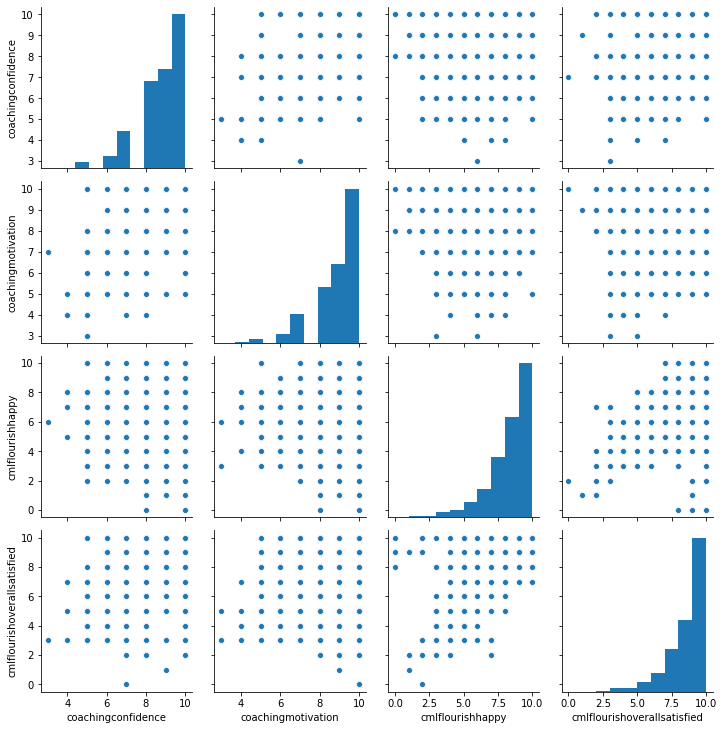

In [56]:
sns.pairplot(small_survey)

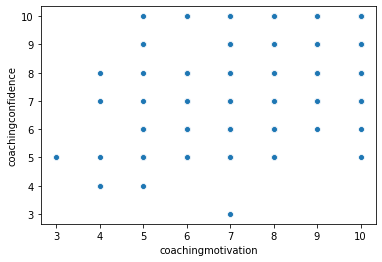

In [57]:
sns.scatterplot(x='coachingmotivation', y='coachingconfidence', data=small_survey)

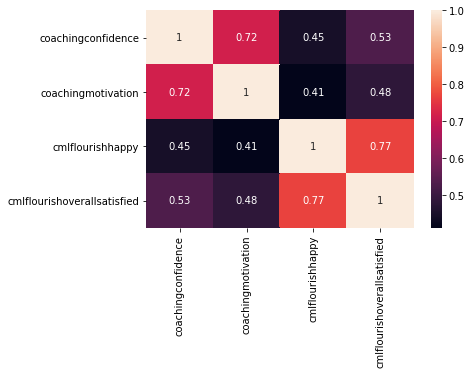

In [58]:

correlation_mat = small_survey.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

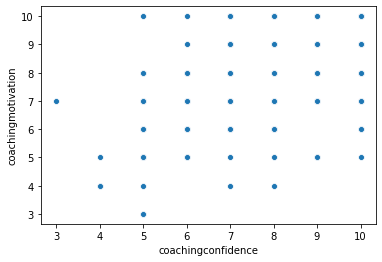

In [59]:
sns.scatterplot(x='coachingconfidence', y='coachingmotivation', data=small_survey)

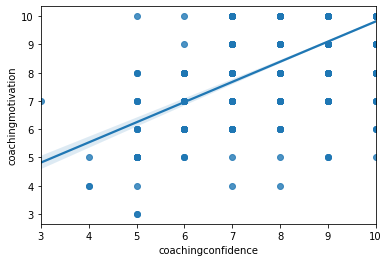

In [60]:
sns.regplot(x='coachingconfidence', y='coachingmotivation', data=small_survey)

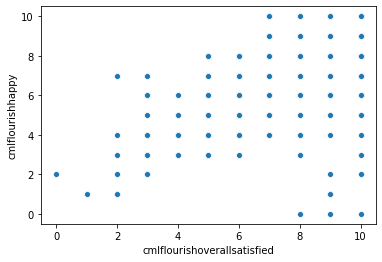

In [61]:
sns.scatterplot(x='cmlflourishoverallsatisfied', y='cmlflourishhappy', data=small_survey)

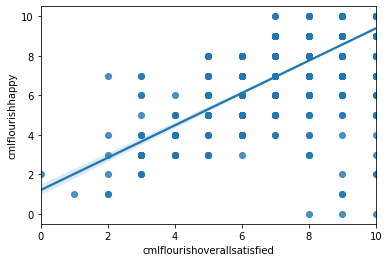

In [62]:
sns.regplot(x='cmlflourishoverallsatisfied', y='cmlflourishhappy', data=small_survey)

In [63]:
X= small_survey[['coachingconfidence']]
y= small_survey[['coachingmotivation']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(638, 1) (638, 1)
(1298, 1) (1298, 1)


In [65]:
model = linear_model.LinearRegression(normalize=True)

In [66]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [67]:
print(model.score(X_train, y_train))

0.5191804237157951


In [68]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'predicted motivation score')

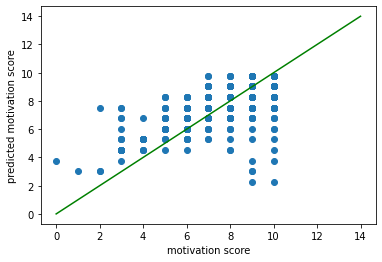

In [104]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='green')
plt.xlabel('motivation score')
plt.ylabel('predicted motivation score')

In [70]:
#Multiple Linear Regression using OLS
X = small_survey.drop(["coachingmotivation"],axis=1)
X = sm.add_constant(X)

In [71]:
y= small_survey[['coachingmotivation']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)

In [73]:
multiple_variables = sm.OLS(y_train, X_train)
mv_results = multiple_variables.fit()

In [74]:
mv_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     coachingmotivation   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     236.5
Date:                Fri, 23 Apr 2021   Prob (F-statistic):          6.05e-103
Time:                        14:39:21   Log-Likelihood:                -781.78
No. Observations:                 638   AIC:                             1572.
Df Residuals:                     634   BIC:                             1589.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.4130      0.251      9.620      0.000       1.920       2.906
coachingconfidence              0.6727      0.032     21.130      0.000       0.610       0.735
cmlflourishhappy                0.0493      0.032      1.535      0.125      -0.014       0.112
cmlflourishoverallsatisfied     0.0334      0.035      0.960      0.337      -0.035       0.102
==============================================================================
Omnibus:                       37.820   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.276
Skew:                          -0.291   Prob(JB):                     5.56e-21
Kurtosis:                       4.780   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
y_pred = mv_results.predict(X_test)

Text(0, 0.5, 'Predicted')

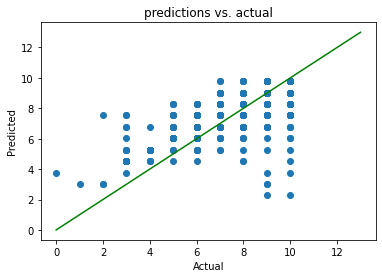

In [105]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,14)],[x for x in range(0,14)], color='green')
plt.title("predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [106]:
X= small_survey[['cmlflourishoverallsatisfied']]
y= small_survey[['cmlflourishhappy']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(638, 1) (638, 1)
(1298, 1) (1298, 1)


In [107]:
model2 = linear_model.LinearRegression(normalize=True)

In [108]:
model2.fit(X_train, y_train)

LinearRegression(normalize=True)

In [109]:
print(model2.score(X_train, y_train))

0.6331035223127117


In [110]:
y_pred = model2.predict(X_test)

Text(0, 0.5, 'predicted happiness score')

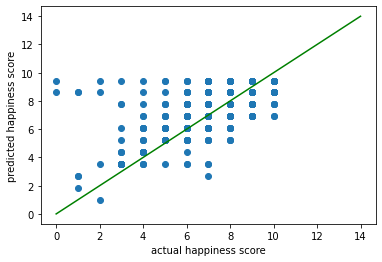

In [111]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='green')
plt.xlabel('actual happiness score')
plt.ylabel('predicted happiness score')


In [77]:
clients.head()

,limeade_e_id__c,limeade_participant_code__c
0,NaN,559551b6-7d03-4529-9464-dacb82611066
1,NaN,559551b6-7d03-4529-9464-dacb82611066
2,NaN,559551b6-7d03-4529-9464-dacb82611066
3,NaN,d3f22c26-ba5e-4590-9505-da5e4ead7829
4,NaN,d3f22c26-ba5e-4590-9505-da5e4ead7829


In [78]:
clients = clients.rename(columns={'limeade_participant_code__c': 'external_participant_id'})

clients

,limeade_e_id__c,external_participant_id
0,NaN,559551b6-7d03-4529-9464-dacb82611066
1,NaN,559551b6-7d03-4529-9464-dacb82611066
2,NaN,559551b6-7d03-4529-9464-dacb82611066
3,NaN,d3f22c26-ba5e-4590-9505-da5e4ead7829
4,NaN,d3f22c26-ba5e-4590-9505-da5e4ead7829
...,...,...
1991183,NaN,NaN
1991184,NaN,NaN
1991185,NaN,NaN
1991186,NaN,NaN


In [79]:
clients['limeade_e_id__c'].unique()

array([nan, 'Worthington', 'EdwardElmhurst', 'CVWD',
       'InterstateBatteries', 'Busey', 'LeviStrauss', 'Iron Mountain',
       'BeWellWithinA', 'KnaufInsulation', 'Benjamin Moore', 'ATC',
       'AkinGump', 'Teknion', 'LKE', 'TDECU', 'CME Group', 'Arkema',
       'EAWellnessJune', 'iowaclinic', 'HazeldenBettyFord',
       'TherapeuticAssociates', 'RoviCorporation', 'Vibe', 'DriveTime',
       'EAWellnessJanuary', 'Union Bank and Trust', 'PortofSeattle',
       'Villanova', 'EPIC', 'ParkwayCorporation', 'WellmetricsDemo', 'DU',
       'HealthPoint', 'Suddath', 'pilotchemical',
       'Zim Integrated Shipping', 'SSOE', 'Kimray', 'CroweHorwath',
       'Mortenson', 'Macquarie', 'EAWellnessDecember', 'EMC Insurance',
       'PullmanRegionalHospital', 'ExtremeNetworks', 'UticaNational',
       'Pingry School', 'ABDteam', 'DistrictMedicalGroup',
       'AscentResources', 'CBHA', 'City of Redmond', 'BioMarin',
       'CitrinCooperman', 'MODEC', 'MSGCU', 'CCMC', 'Parametrix',
       'RaceT

In [83]:
client_survey= pd.merge(survey, clients, on="external_participant_id")
client_survey.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time,limeade_e_id__c
0,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18,NaN
1,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18,NaN
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18,NaN
3,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,7.0,6.0,6.0,neutral,very_satisfied,NaN,NaN,NaN,00:01:16,NaN
4,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,7.0,6.0,6.0,neutral,very_satisfied,NaN,NaN,NaN,00:01:16,NaN


In [81]:
client_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19773 entries, 0 to 19772
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     19773 non-null  int64          
 1   survey_title                  19773 non-null  object         
 2   status                        19773 non-null  int64          
 3   publish_id                    19773 non-null  int64          
 4   contact_id                    19773 non-null  object         
 5   external_participant_id       19773 non-null  object         
 6   employer_id                   16629 non-null  object         
 7   start_date_time_stamp         19773 non-null  datetime64[ns] 
 8   end_date_time_stamp           19773 non-null  datetime64[ns] 
 9   coachingconfidence            19773 non-null  float64        
 10  coachingmotivation            19773 non-null  float64        
 11  cmlflourishover

In [84]:
client_survey['survey_id'].unique()

array([1616])

In [ ]:
client_survey[client_survey['external_participant_id'] != 'nan']

In [ ]:
client_survey['start_date_time_stamp'].dropna()

In [ ]:
client_survey.info()